# Introduction

### Description

The goal of this class project is to investigate various Exploratory Data Analysis techniques utilizing Pandas, along with data visualization through matplotlib/seaborn, Data Preprocessing, and Feature Engineering. The focus of the study is to analyze how AirBnB occupancy rates were affected prior to and during the Taylor Swift Eras Tour in June 2023.

#### 1. Data Collection and Preparation

In [ ]:
import pandas as pd

# Path to the listings dataset
listings_data = 'data/listings-chicago-june-2023.csv'

# Load the dataset
df = pd.read_csv(listings_data)

# Display the first few rows of the dataframe
print(df.head())


In [ ]:
# Basic info about dataset
print(df.info())

# Summary statistics for numerical features
print(df.describe())

# Count of missing values in each column
print(df.isnull().sum())


In [7]:
print(df.iloc[0])  # First row
print(df["price"])  # Accessing the 'price' column



id                                                                           1461451
listing_url                                     https://www.airbnb.com/rooms/1461451
scrape_id                                                             20231218032601
last_scraped                                                              2023-12-18
source                                                                   city scrape
                                                                ...                 
calculated_host_listings_count                                                    15
calculated_host_listings_count_entire_homes                                        0
calculated_host_listings_count_private_rooms                                       4
calculated_host_listings_count_shared_rooms                                       11
reviews_per_month                                                               1.49
Name: 0, Length: 75, dtype: object
0        $28.00
1       $146.0

### Data Cleaning

- Dropping unnecessary columns 
- Converting data types

In [12]:
df = df.drop(['scrape_id', 'last_scraped', 'source'], axis=1)

In [22]:
# Calculate the percentage of missing values for each column
missing_percentages = df.isnull().mean() * 100

# Sort the percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=False).head(20)

# Display the sorted percentages
print(missing_percentages_sorted)



host_about                     32.942228
neighborhood_overview          28.852386
neighbourhood                  28.841211
reviews_per_month              21.309644
first_review                   21.309644
last_review                    21.309644
review_scores_communication    21.253771
review_scores_cleanliness      21.253771
review_scores_accuracy         21.242597
review_scores_value            21.242597
review_scores_location         21.242597
review_scores_checkin          21.242597
review_scores_rating           21.242597
host_location                  19.108280
license                        18.672477
host_response_rate             12.638284
host_response_time             12.638284
host_acceptance_rate            9.621187
has_availability                6.827579
price                           6.827579
dtype: float64


In [23]:
# Display columns with more than 80% mising values

threshold = 80  # 80% missing values

# Find and print columns with missing value percentage greater than the threshold
columns_with_missing_data = missing_percentages[missing_percentages > threshold]
print(columns_with_missing_data)


Series([], dtype: float64)


In [24]:
# Drop columns with a high percentage of missing values
df = df.drop(columns_with_missing_data.index, axis=1)


In [25]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

subset_df = df[df["price"] > 100]  # Subsetting for rows where price is greater than 100
print(subset_df.head())


         id                           listing_url  \
1   1502674  https://www.airbnb.com/rooms/1502674   
6   1584422  https://www.airbnb.com/rooms/1584422   
8     10945    https://www.airbnb.com/rooms/10945   
9   1591370  https://www.airbnb.com/rooms/1591370   
11    12140    https://www.airbnb.com/rooms/12140   

                                                 name  \
1   Rental unit in Chicago · ★4.79 · 2 bedrooms · ...   
6   Rental unit in Chicago · ★4.93 · 3 bedrooms · ...   
8   Rental unit in Chicago · ★4.63 · 2 bedrooms · ...   
9   Rental unit in Chicago · ★4.83 · 1 bedroom · 4...   
11  Boutique hotel in Chicago · ★4.93 · 1 bedroom ...   

                                neighborhood_overview  \
1   Old Town is the Historic District of Chicago. ...   
6   Located at the crossroads of Lincoln Park - Ol...   
8                                                 NaN   
9   Quaint residential neighborhood with tree line...   
11  The Guest House is in the heart of Chicago's m...

In [26]:
# Filter listings with a price greater than 100 and available for more than 30 days a year
high_price_avail = df[(df["price"] > 100) & (df["availability_365"] > 30)]
print(high_price_avail.head())


         id                           listing_url  \
8     10945    https://www.airbnb.com/rooms/10945   
9   1591370  https://www.airbnb.com/rooms/1591370   
11    12140    https://www.airbnb.com/rooms/12140   
12  1620098  https://www.airbnb.com/rooms/1620098   
15    28749    https://www.airbnb.com/rooms/28749   

                                                 name  \
8   Rental unit in Chicago · ★4.63 · 2 bedrooms · ...   
9   Rental unit in Chicago · ★4.83 · 1 bedroom · 4...   
11  Boutique hotel in Chicago · ★4.93 · 1 bedroom ...   
12  Rental unit in Chicago · ★4.66 · 1 bedroom · 1...   
15  Loft in Chicago · ★4.78 · 3 bedrooms · 3 beds ...   

                                neighborhood_overview  \
8                                                 NaN   
9   Quaint residential neighborhood with tree line...   
11  The Guest House is in the heart of Chicago's m...   
12  A few steps away from main street (Clark).<br ...   
15  Bucktown is a thriving community on the Northw...

### 2. Visualization

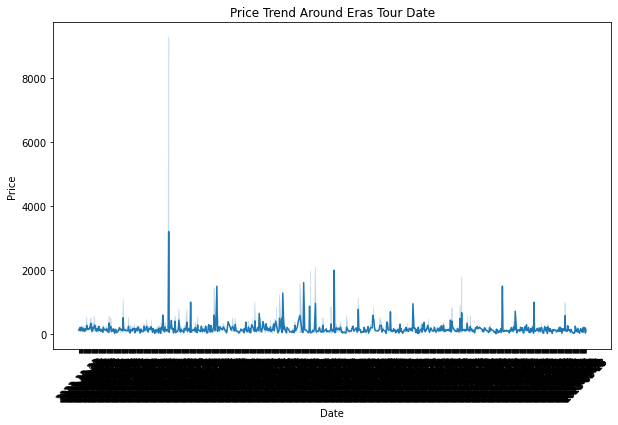

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Price Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='last_review', y='price') # could not find list date on the dataset, referred to last review instead
plt.title('Price Trend Around Eras Tour Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
